In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\jithu\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [5]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
data.drop(columns='Gender',axis=0,inplace=True)

In [7]:
data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [8]:
data["Weight"]=data["Weight"]/2.2046
data


,Height,Weight
0,73.847017,109.722200
1,68.781904,73.623547
2,74.110105,96.498619
3,71.730978,99.810610
4,69.881796,93.599656
...,...,...
9995,66.172652,62.041846
9996,67.067155,77.505174
9997,63.867992,58.276022
9998,69.034243,74.322989


In [9]:
data["Height"]=data["Height"]/0.393701
data

,Height,Weight
0,187.571322,109.722200
1,174.705942,73.623547
2,188.239566,96.498619
3,182.196587,99.810610
4,177.499666,93.599656
...,...,...
9995,168.078446,62.041846
9996,170.350481,77.505174
9997,162.224613,58.276022
9998,175.346883,74.322989


In [10]:
x=data[["Height"]]
y=data[["Weight"]]
type(x)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Weight')

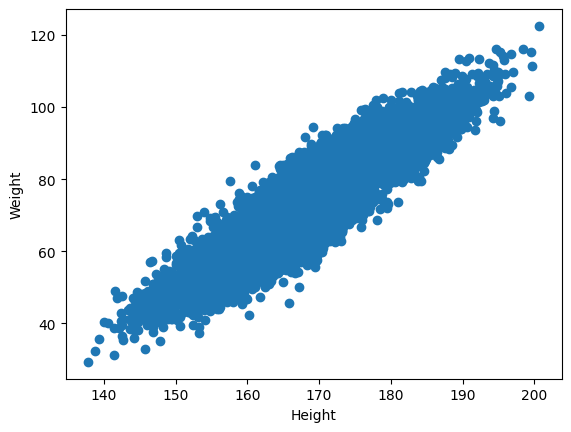

In [11]:
plt.scatter(x,y)
plt.xlabel("Height")
plt.ylabel('Weight')

## MODEL BUILDING

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()
model

LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
pred=model.predict(x)

In [16]:

data["Weight Predict"]=pred
data

,Height,Weight,Weight Predict
0,187.571322,109.722200,99.410995
1,174.705942,73.623547,81.680371
2,188.239566,96.498619,100.331946
3,182.196587,99.810610,92.003720
4,177.499666,93.599656,85.530585
...,...,...,...
9995,168.078446,62.041846,72.546584
9996,170.350481,77.505174,75.677824
9997,162.224613,58.276022,64.479033
9998,175.346883,74.322989,82.563694


In [17]:
model.intercept_

array([-159.09334655])

In [18]:
model.coef_

array([[1.37816559]])

In [19]:
## y = p0+p1x1
model.intercept_+(model.coef_)*187.571322

array([[99.41099525]])

In [20]:
from sklearn.metrics import r2_score

In [21]:
## ACCURACY

r2_score(data["Weight"],data["Weight Predict"])

0.8551742120609958